<a href="https://colab.research.google.com/github/sebasmos/SolarFlares-Standford/blob/master/SunAnalysis_TensorFlow_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ANALISIS REGISTRO AGO DHO 9190 2020-03-26T00.00.00 
BASE DE DATOS DE STANDFORD:  http://sid.stanford.edu/database-browser/


In [15]:
#Librerias generales
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
#Librerias de TF
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
print(tf.__version__)

2.2.0-rc1


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


In [3]:
df = pd.read_csv('drive/My Drive/Colab Notebooks/Standford2.csv',sep=',')
df.head()


,Dates,Signal
0,26/03/2020 00:00,8.665237
1,26/03/2020 00:00,8.614451
2,26/03/2020 00:00,8.563666
3,26/03/2020 00:00,8.512880
4,26/03/2020 00:00,8.379232


Etapa de analisis de datos

In [0]:
#Leemos las dos variables disponibles
Dates = df[['Dates']].values
Signal = df[['Signal']].values

In [6]:
# Calculamos el numero total de muestras disponibles
print("Muestras totales medidas: ", df['Dates'].nunique())
#Lo guardamos en M
M = df['Dates'].nunique()

Muestras totales medidas:  1440


1440

In [0]:
# Estadisticas generales de la senal
train_stats = df.describe()
train_stats
mean = 6.339291
std = 1.510516

In [11]:
# A traves de Dataframe guardamos los datos
Dataset = DataFrame(df,columns=['Dates','Signal'])
print(df)

                  Dates    Signal
0      26/03/2020 00:00  8.665237
1      26/03/2020 00:00  8.614451
2      26/03/2020 00:00  8.563666
3      26/03/2020 00:00  8.512880
4      26/03/2020 00:00  8.379232
...                 ...       ...
17275  26/03/2020 23:59  7.842043
17276  26/03/2020 23:59  7.932124
17277  26/03/2020 23:59  8.022205
17278  26/03/2020 23:59  8.112286
17279  26/03/2020 23:59  8.202366

[17280 rows x 2 columns]


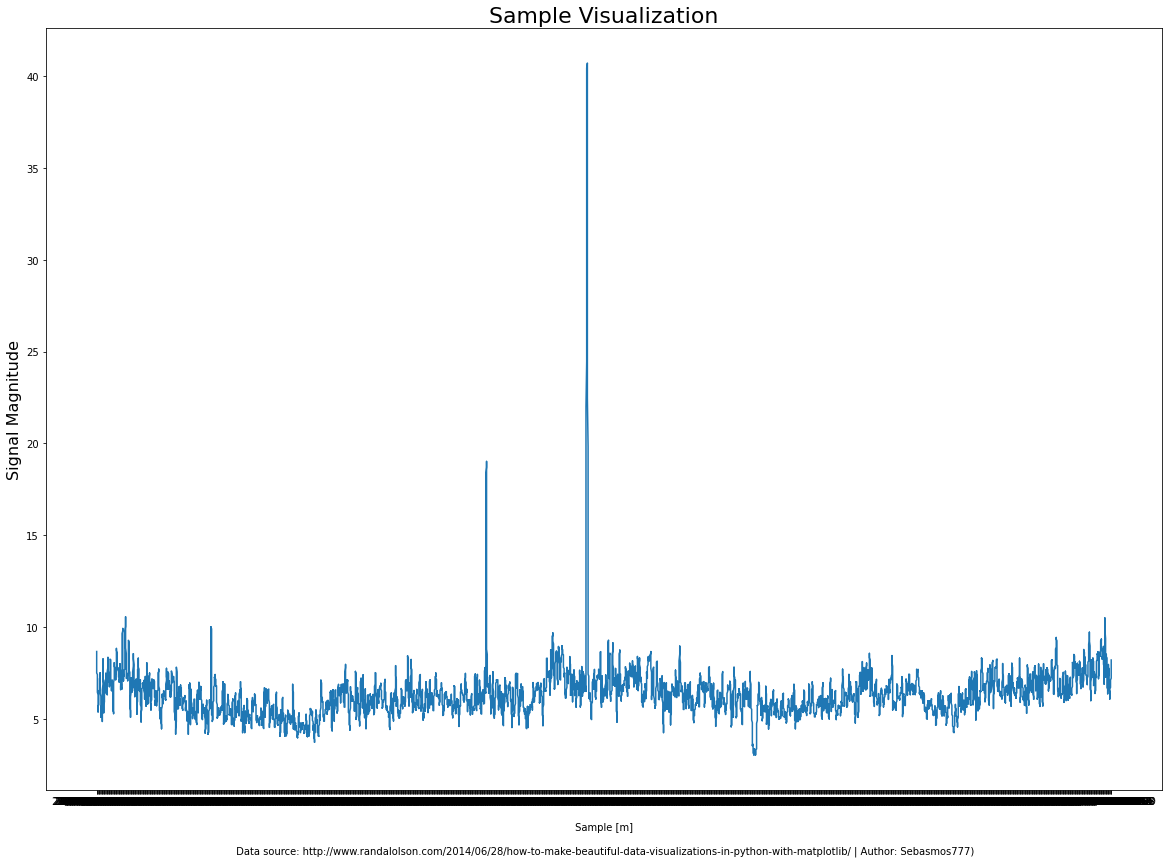

In [59]:
## Primero graficamos en terminos de muestras
# Para cada fecha podemos generar una muestra
x = [x for x in range(len(Dates))]

# Signal is saved as multi-tensorial array, conver to 1-dimensional with
Signal = Signal.ravel()
Dates = Dates.ravel() # Para convertir a array unidimensional

plt.figure(figsize=(20, 14)) 
plt.plot(Dates, Signal, '-') # Reemplazar x por Dates para obtener en terminos fechas

#Add gadgets
plt.ylabel("Signal Magnitude", fontsize=16) 
plt.xlabel("\n Sample [m] \n\n Data source: http://www.randalolson.com/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/ | "  
           "Author: Sebasmos777)", fontsize=10)  
# Zoom in for filling
plt.fill_between(x, Signal, 195, where=(Signal > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization",fontsize=22)
plt.show()

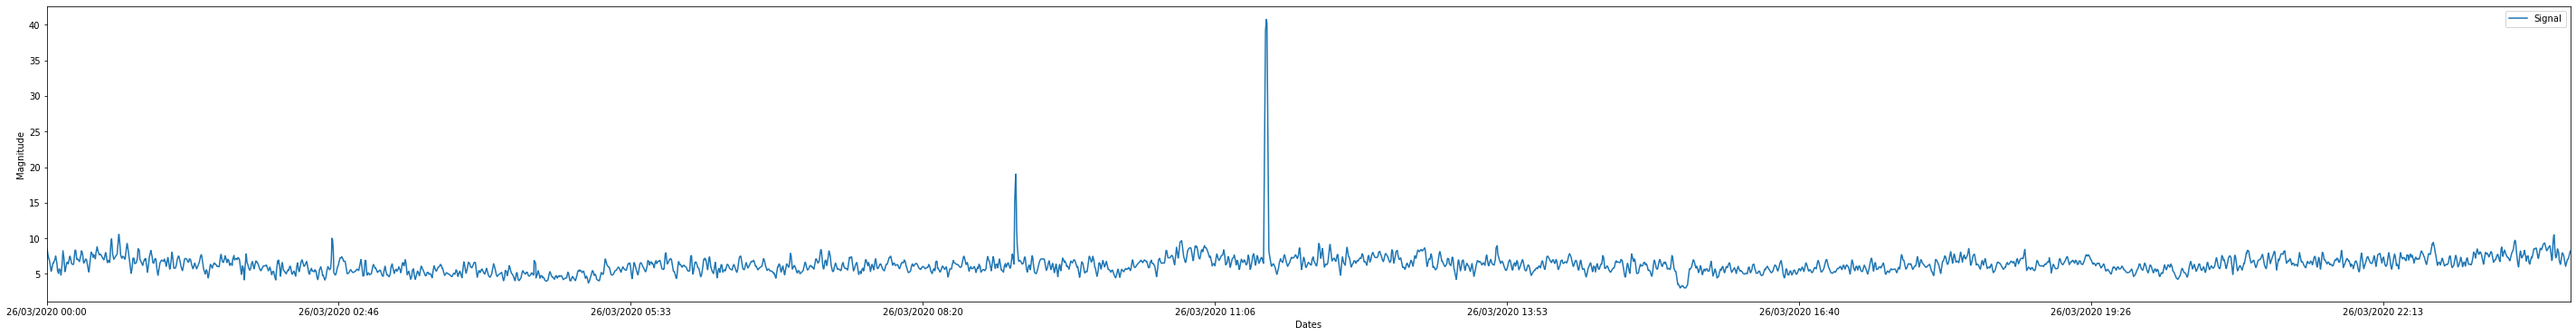

In [27]:
#Grafica general en terminos de fechas
df.plot(x ='Dates', y='Signal', kind = 'line',figsize=(50,6))
plt.xlabel('Dates')
plt.ylabel('Magnitude')
plt.show()

Total of sick people 1440


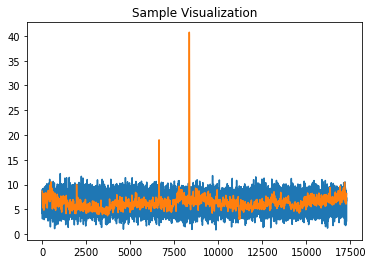

In [72]:
##Anadimos ruido
print("Total of sick people {}".format(M))

for i in range(1,M,1):
  ys = mean + std*np.random.randn(17280)

x = [x for x in range(len(ys))]
plt.plot(x, ys, '-',x, Signal, '-', )
plt.title("Sample Visualization")
plt.show()


#from scipy import fftpack

#X = fftpack.fft(Signal)

#freqs = fftpack.fftfreq(len(x)) * f_s

#fig, ax = plt.subplots()

#ax.stem(freqs, np.abs(X))
#ax.set_xlabel('Frequency in Hertz [Hz]')
#ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
#ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)
  